<a href="https://colab.research.google.com/github/KarivetiKeerthi/Scaler-Projects/blob/main/loan_tap_logisticregression_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,chi2_contingency,t

In [ ]:
!pip install numpy

In [ ]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 42.1MB/s] 


In [ ]:
df = pd.read_csv('logistic_regression.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [ ]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [ ]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [ ]:
df.isna().sum().sum()

81590

In [ ]:
unique = df.nunique()
unique

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
df["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [ ]:
df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

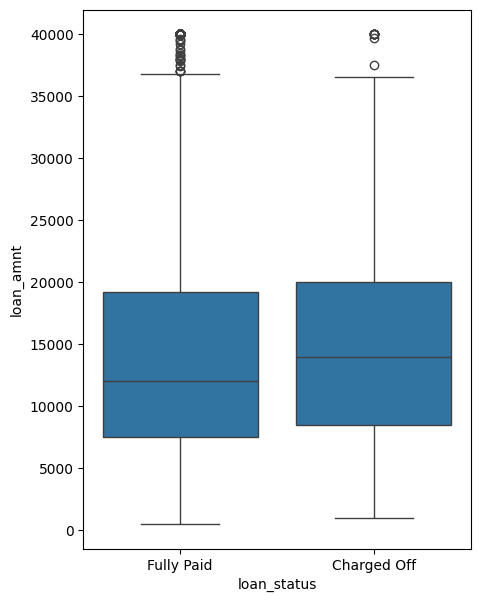

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df["loan_amnt"],
            x=df["loan_status"])

<Axes: xlabel='loan_amnt', ylabel='Count'>

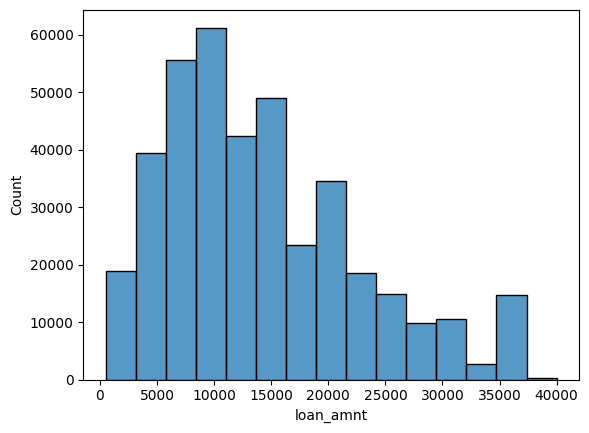

In [ ]:
sns.histplot(df["loan_amnt"],bins = 15)

In [ ]:
df["term"].value_counts(dropna=False)

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [ ]:
pd.crosstab(index=df["term"],
            columns=df["loan_status"], normalize="index" , margins  = True
           ) * 100

loan_status,Charged Off,Fully Paid
term,,
36 months,15.774573,84.225427
60 months,31.941505,68.058495
All,19.612908,80.387092


<Axes: xlabel='term'>

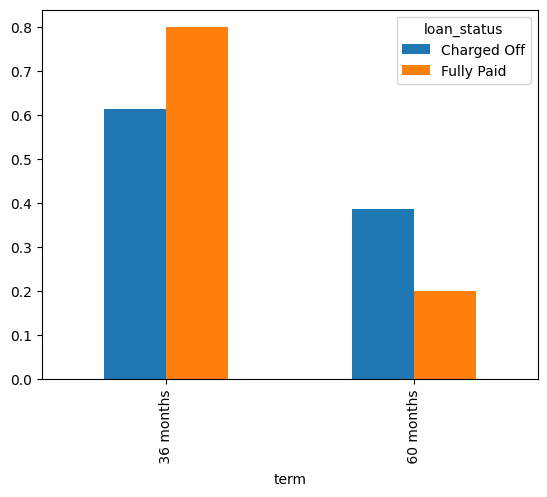

In [ ]:
pd.crosstab(index=df["term"],
            columns =df["loan_status"], normalize="columns").plot(kind = "bar")

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df['term'].map(term_values)

In [ ]:
df.groupby(by = "loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


<Axes: xlabel='int_rate', ylabel='Count'>

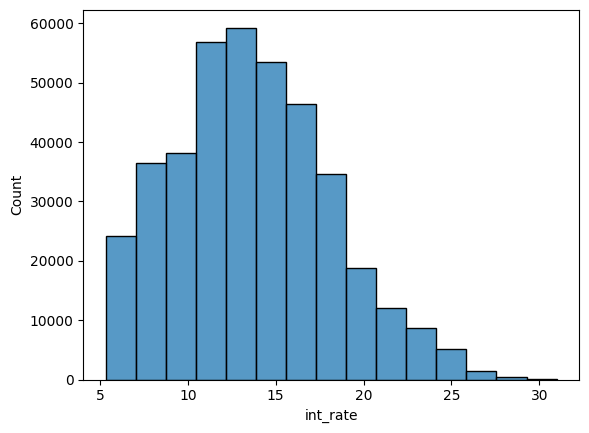

In [ ]:
sns.histplot(df["int_rate"],bins = 15)

<Axes: xlabel='int_rate', ylabel='loan_status'>

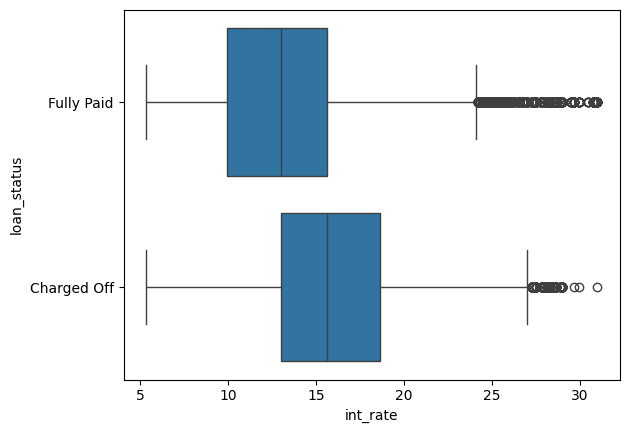

In [ ]:
sns.boxplot(x=df["int_rate"],
            y=df["loan_status"])

In [ ]:
df[df["loan_status"] == "Charged Off"]["int_rate"].median(),df[df["loan_status"] == "Charged Off"]["int_rate"].mean()

(15.61, 15.882587256833133)

In [ ]:
df[df["loan_status"] == "Fully Paid"]["int_rate"].median(),df[df["loan_status"] == "Fully Paid"]["int_rate"].mean()

(12.99, 13.092105403682032)

<Axes: xlabel='grade'>

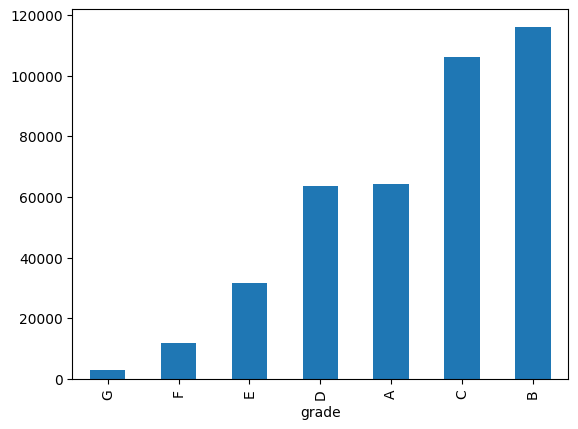

In [ ]:
df["grade"].value_counts().sort_values().plot(kind = "bar")

In [ ]:
df["grade"].value_counts(dropna=False)

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [ ]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "index", margins = True)

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611
All,0.196129,0.803871


<Axes: xlabel='grade'>

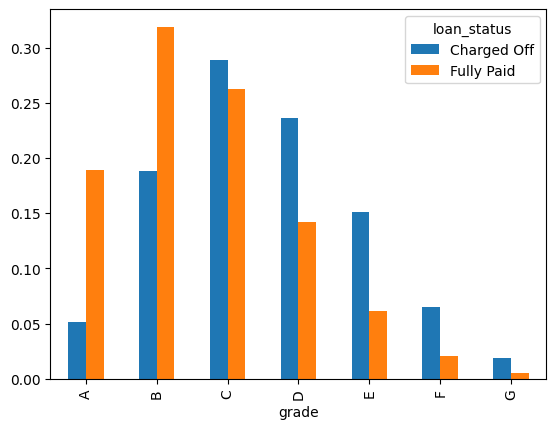

In [ ]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

<Axes: xlabel='sub_grade'>

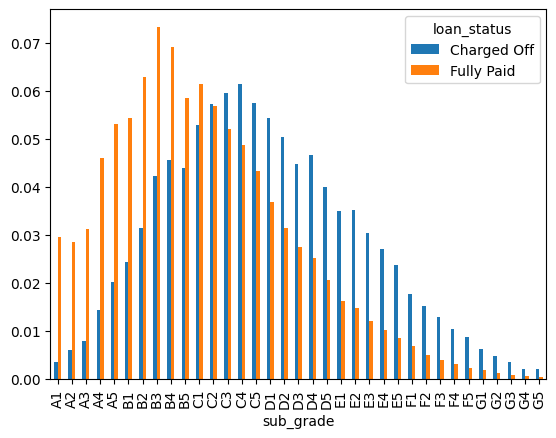

In [ ]:
pd.crosstab(index = df["sub_grade"],
            columns= df["loan_status"],normalize= "columns", ).plot(kind = "bar")

In [ ]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

emp_title
NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: count, dtype: int64

In [ ]:
df["emp_length"].value_counts(dropna=False)

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: count, dtype: int64

In [ ]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,19.913453,80.086547
10+ years,18.418610,81.581390
2 years,19.326206,80.673794
3 years,19.523133,80.476867
4 years,19.238477,80.761523
5 years,19.218721,80.781279
6 years,18.919438,81.080562
7 years,19.477400,80.522600
8 years,19.976002,80.023998


<Axes: xlabel='emp_length'>

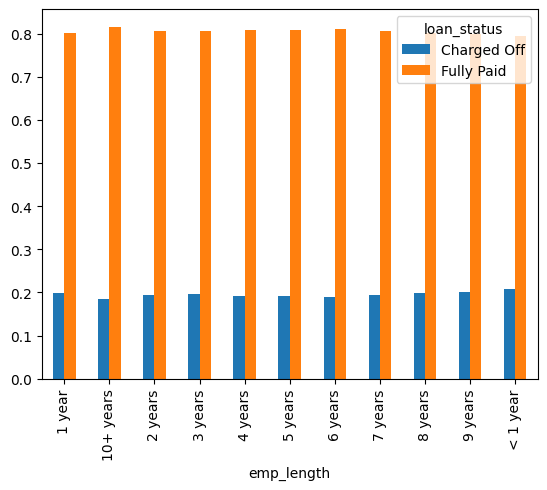

In [ ]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [ ]:
stats.chi2_contingency(pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"]))

NameError: name 'stats' is not defined

In [ ]:
df["home_ownership"].value_counts(dropna=False)

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [ ]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})

In [ ]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.956057,83.043943
OTHER,15.753425,84.246575
OWN,20.680337,79.319663
RENT,22.662244,77.337756
All,19.612908,80.387092


<Axes: xlabel='home_ownership'>

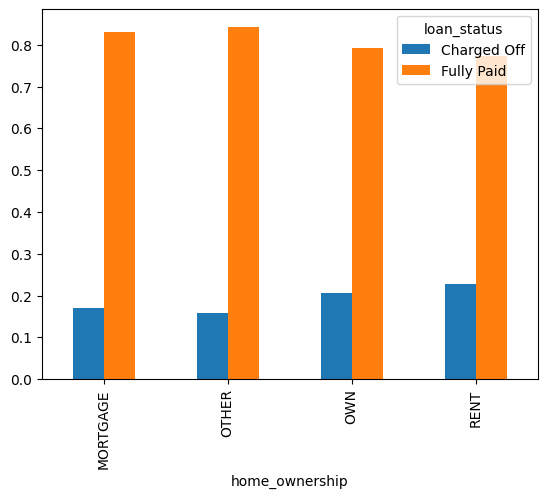

In [ ]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index").plot(kind= "bar")

<ipython-input-41-c31ff4201efc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["annual_inc"])


<Axes: xlabel='annual_inc', ylabel='Density'>

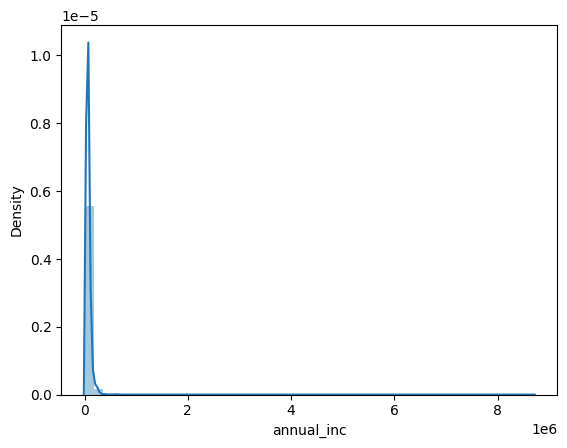

In [ ]:
sns.distplot(df["annual_inc"])

In [ ]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

<ipython-input-43-b7f7febce012>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]))


<Axes: xlabel='annual_inc', ylabel='Density'>

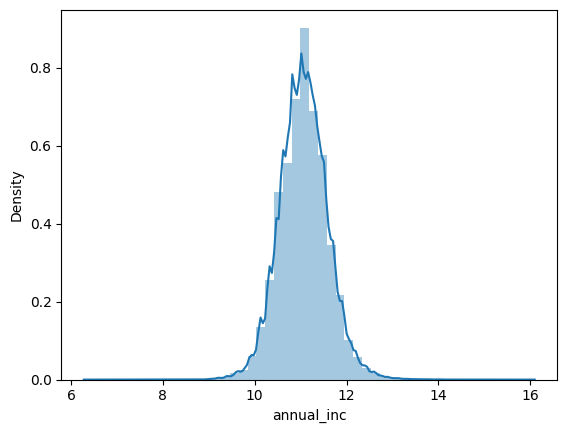

In [ ]:
sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]))

<Axes: xlabel='loan_status', ylabel='annual_inc'>

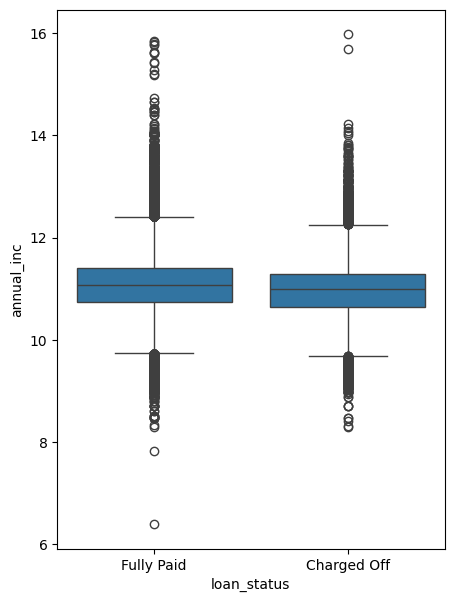

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["annual_inc"]>0]["annual_inc"]),
            x=df["loan_status"])

In [ ]:
df["verification_status"].value_counts(dropna=False)

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [ ]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.635999,85.364001
Source Verified,21.474293,78.525707
Verified,22.321102,77.678898
All,19.612908,80.387092


<Axes: xlabel='verification_status'>

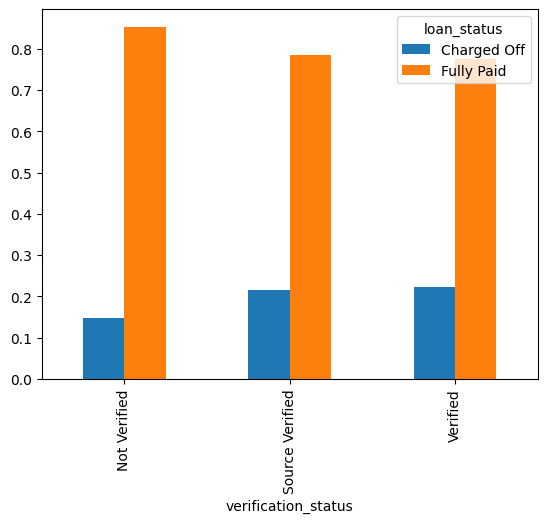

In [ ]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [ ]:
df["purpose"].nunique()

14

In [ ]:
print(df["purpose"].value_counts(dropna=False))
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64


loan_status,Charged Off,Fully Paid
purpose,,
car,13.476687,86.523313
credit_card,16.711837,83.288163
debt_consolidation,20.741385,79.258615
educational,16.342412,83.657588
home_improvement,17.007907,82.992093
house,19.718310,80.281690
major_purchase,16.473265,83.526735
medical,21.711153,78.288847
moving,23.475823,76.524177


<Axes: xlabel='purpose'>

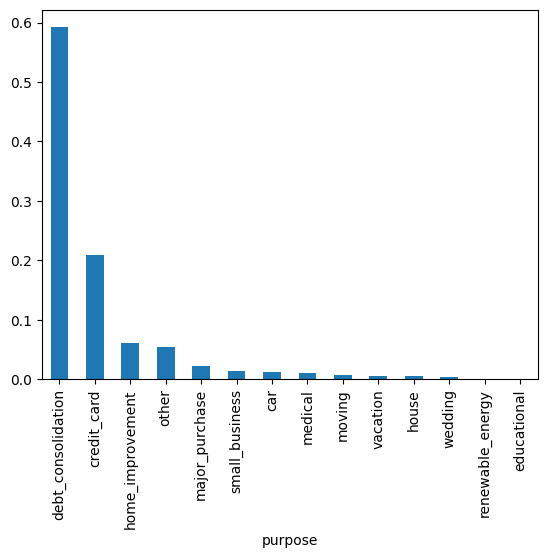

In [ ]:
(df["purpose"].value_counts(dropna=False,normalize=True)).plot(kind = "bar")

<Axes: xlabel='loan_status'>

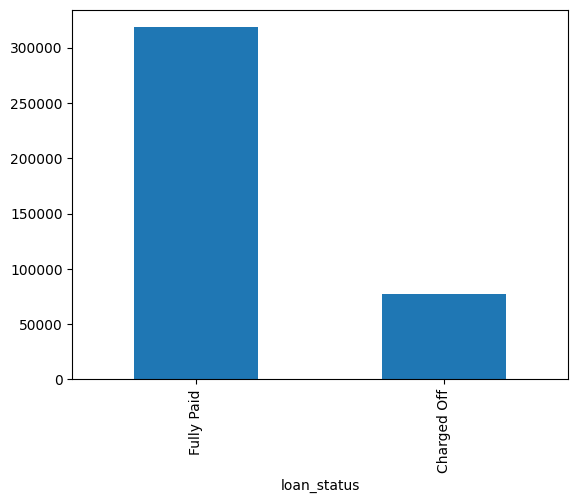

In [ ]:
df["loan_status"].value_counts(dropna=False).plot(kind = "bar")

In [ ]:
df["loan_status"].value_counts(dropna=False, normalize=True)  * 100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

<Axes: ylabel='dti'>

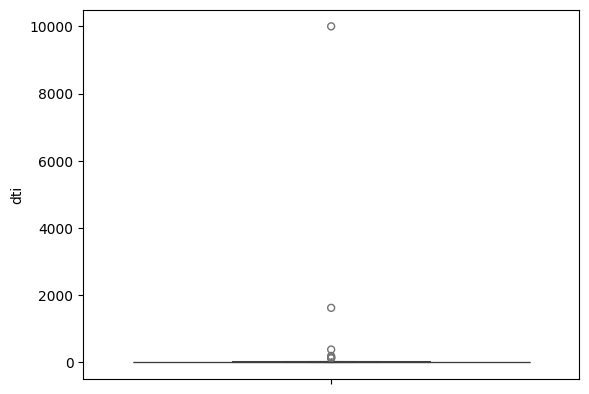

In [ ]:
sns.boxenplot((df["dti"]))

<Axes: xlabel='loan_status', ylabel='dti'>

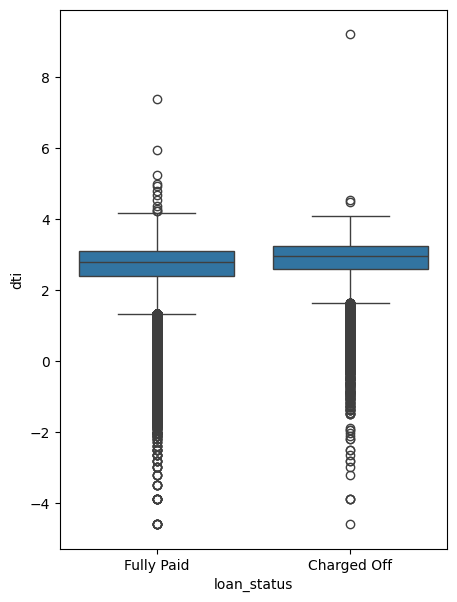

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["dti"]>0]["dti"]),
            x=df["loan_status"])

In [ ]:
df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) - pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

<ipython-input-55-d20e3efe6424>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) - pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))
<ipython-input-55-d20e3efe6424>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) - pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))


<ipython-input-56-aeea1407b826>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))
<ipython-input-56-aeea1407b826>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))


<Axes: ylabel='Count'>

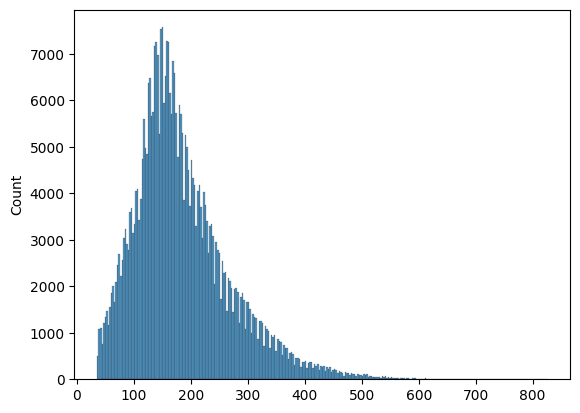

In [ ]:
 sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))

<ipython-input-57-0ec806d09781>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
<ipython-input-57-0ec806d09781>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),


<Axes: xlabel='loan_status', ylabel='None'>

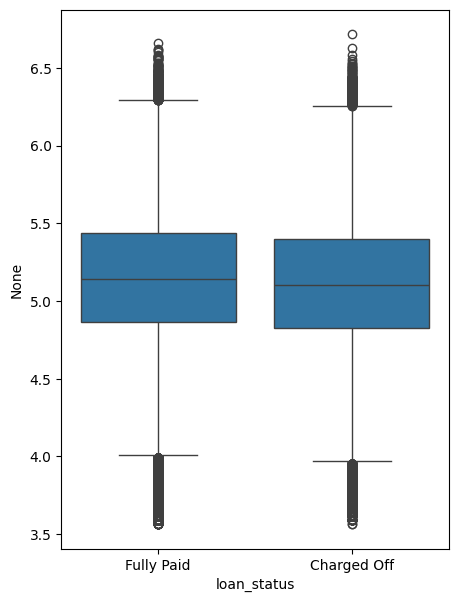

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"])

In [ ]:
df.groupby("loan_status")["open_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,11.602513,5.288507,0.0,8.0,11.0,14.0,76.0
Fully Paid,318357.0,11.240067,5.097647,0.0,8.0,10.0,14.0,90.0


<Axes: xlabel='open_acc', ylabel='Count'>

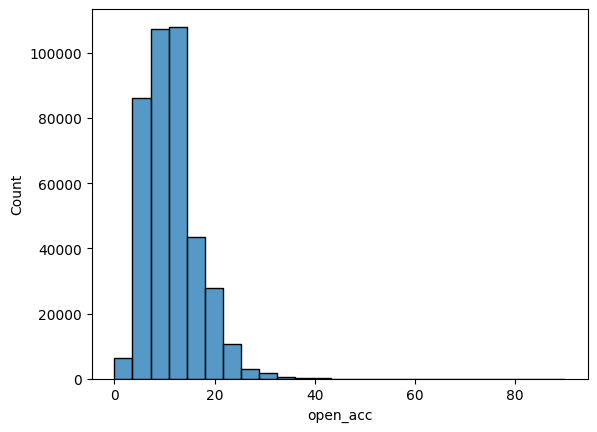

In [ ]:
sns.histplot(df["open_acc"],bins = 25)

<Axes: xlabel='loan_status', ylabel='open_acc'>

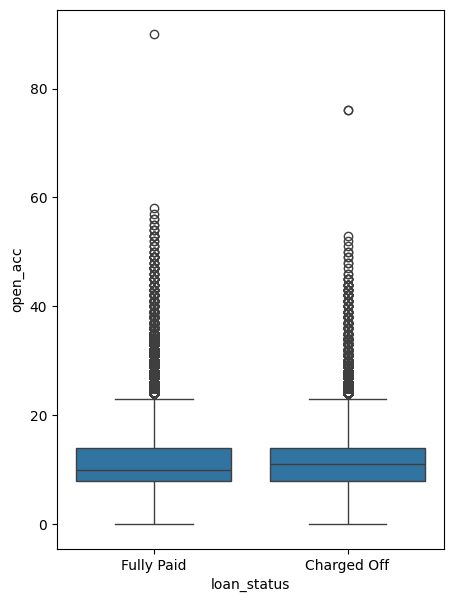

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["open_acc"],
            x=df["loan_status"])

In [ ]:
df.groupby("loan_status")["pub_rec"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,0.199606,0.648283,0.0,0.0,0.0,0.0,86.0
Fully Paid,318357.0,0.172966,0.497637,0.0,0.0,0.0,0.0,24.0


<Axes: xlabel='loan_status', ylabel='pub_rec'>

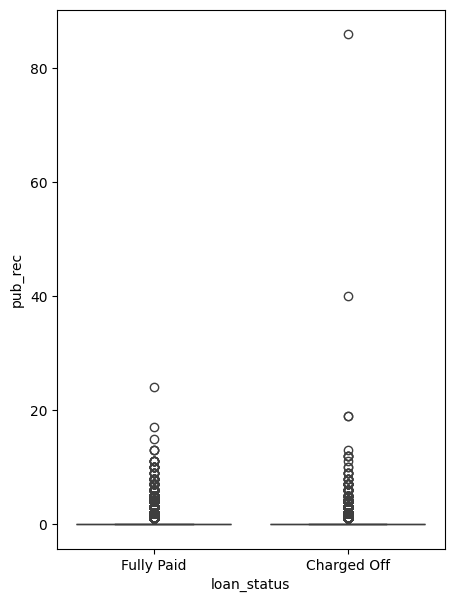

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["pub_rec"],
            x=df["loan_status"])

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64


<Axes: xlabel='pub_rec'>

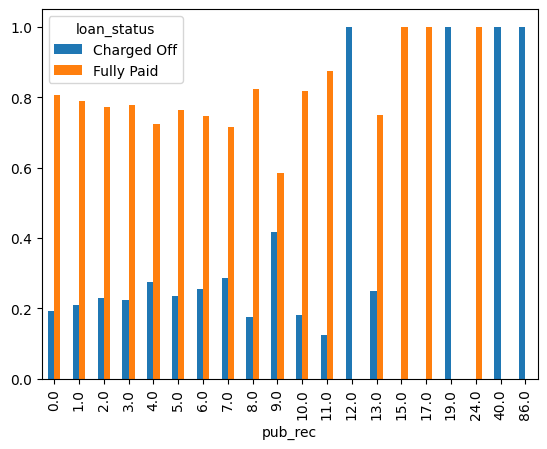

In [ ]:
print(df["pub_rec"].value_counts(dropna=False))
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["pub_rec"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [ ]:
df.groupby("loan_status")["revol_bal"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15390.454701,18203.387930,0.0,6150.0,11277.0,19485.0,1030826.0
Fully Paid,318357.0,15955.327918,21132.193457,0.0,5992.0,11158.0,19657.0,1743266.0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='revol_bal', ylabel='Count'>

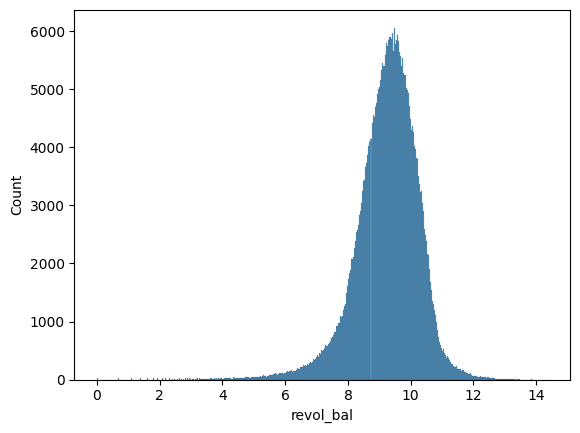

In [ ]:
sns.histplot(np.log(df["revol_bal"]))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='loan_status', ylabel='revol_bal'>

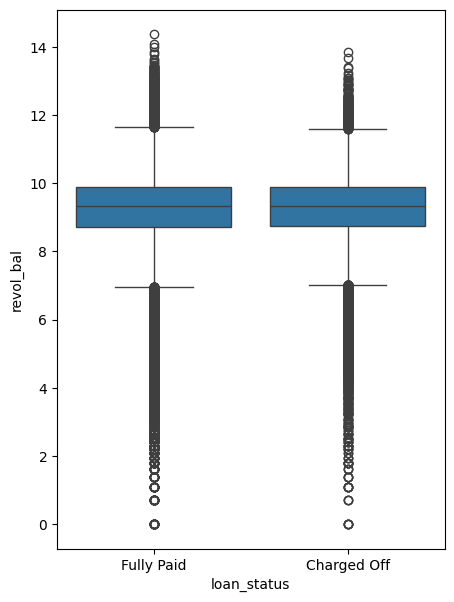

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_bal"]),
            x=df["loan_status"])

In [ ]:
df.groupby("loan_status")["revol_util"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77610.0,57.869824,23.492176,0.0,41.2,59.3,76.2,148.0
Fully Paid,318144.0,52.796918,24.578304,0.0,34.6,53.7,72.0,892.3


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='loan_status', ylabel='revol_util'>

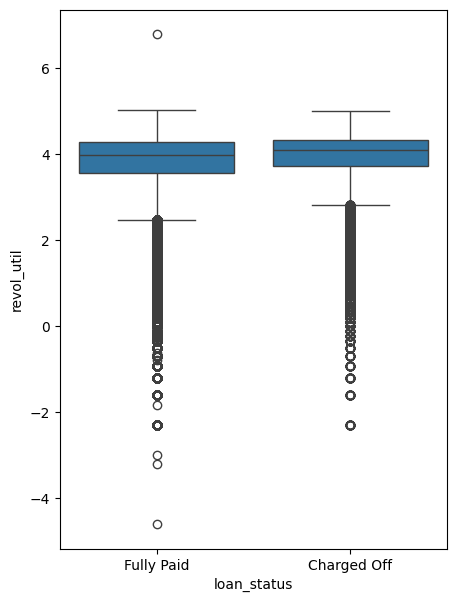

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_util"]),
            x=df["loan_status"])

In [ ]:
df.groupby("loan_status")["total_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,24.984152,11.913692,2.0,16.0,23.0,32.0,151.0
Fully Paid,318357.0,25.519800,11.878117,2.0,17.0,24.0,32.0,150.0


<Axes: xlabel='loan_status', ylabel='total_acc'>

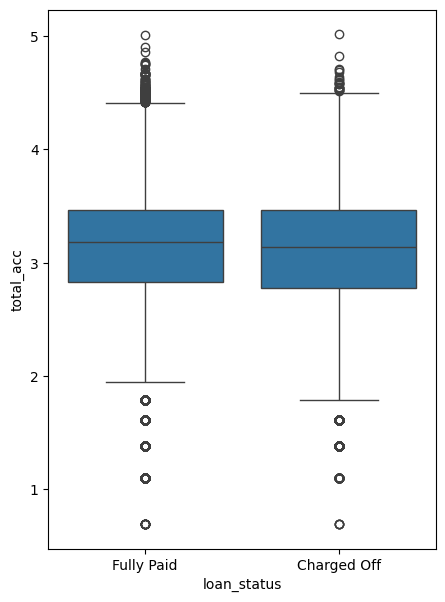

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["total_acc"]),
            x=df["loan_status"])

In [ ]:
df["initial_list_status"].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

initial_list_status
f    238066
w    157964
Name: count, dtype: int64


<Axes: xlabel='initial_list_status'>

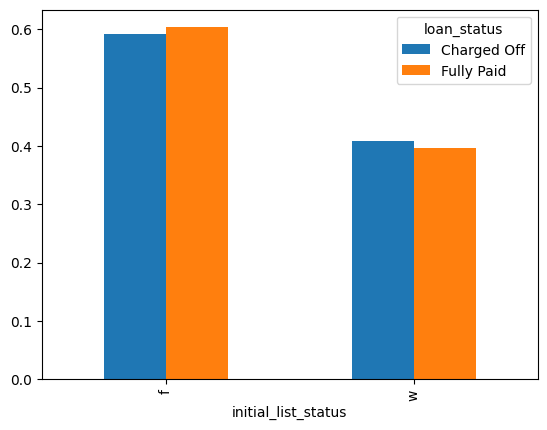

In [ ]:
print(df["initial_list_status"].value_counts(dropna=False))

pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"],normalize= "columns").plot(kind = "bar")

In [ ]:
df["application_type"].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64


<Axes: xlabel='application_type'>

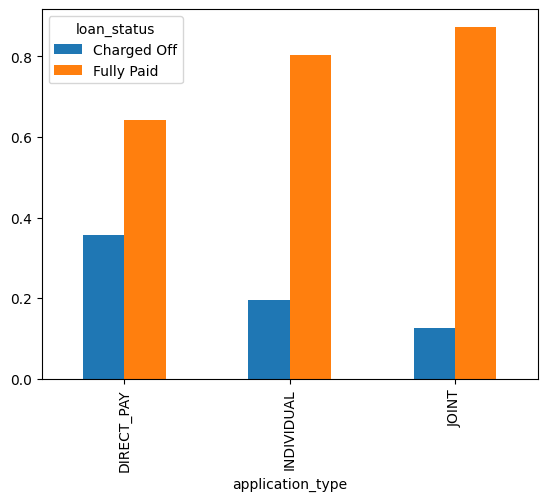

In [ ]:
print(df["application_type"].value_counts(dropna=False))

pd.crosstab(index = df["application_type"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [ ]:
df.groupby("loan_status")["mort_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,72123.0,1.501213,1.974353,0.0,0.0,1.0,2.0,23.0
Fully Paid,286112.0,1.892836,2.182456,0.0,0.0,1.0,3.0,34.0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='loan_status', ylabel='mort_acc'>

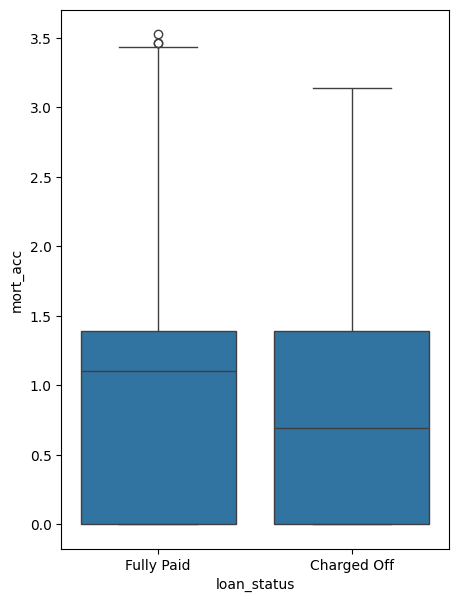

In [ ]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["mort_acc"]),
            x=df["loan_status"])

<Axes: xlabel='mort_acc'>

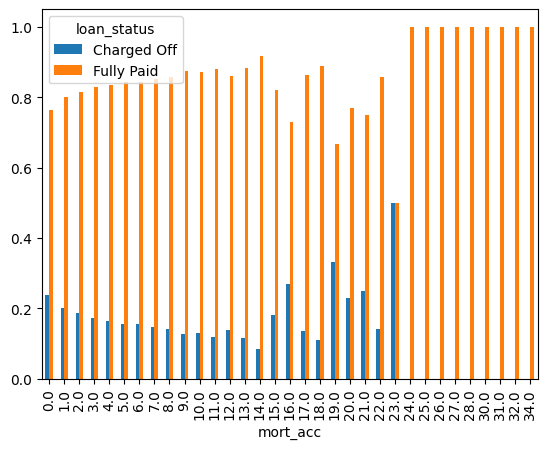

In [ ]:
pd.crosstab(index = df["mort_acc"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     19.499115   80.500885
1.0                     20.394952   79.605048
2.0                     23.226854   76.773146
3.0                     21.082621   78.917379
4.0                     31.707317   68.292683
5.0                     15.625000   84.375000
6.0                     28.571429   71.428571
7.0                     25.000000   75.000000
8.0                     50.000000   50.000000
All                     19.617441   80.382559


<Axes: xlabel='pub_rec_bankruptcies'>

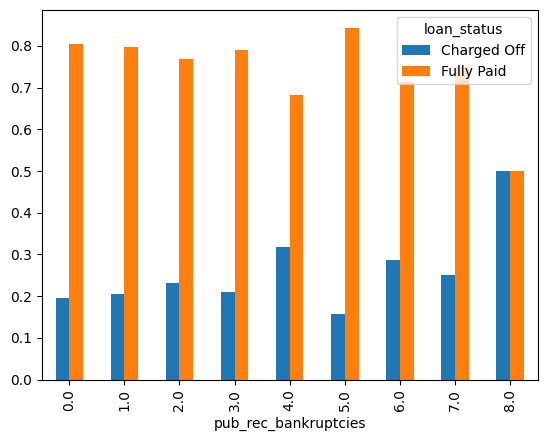

In [ ]:
print(df["pub_rec_bankruptcies"].value_counts(dropna=False))
print(pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index", margins = True)*100)
pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [ ]:
df["address"] = df["address"].str.split().apply(lambda x:x[-1])

In [ ]:
df["address"].value_counts()

address
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

<Axes: xlabel='address'>

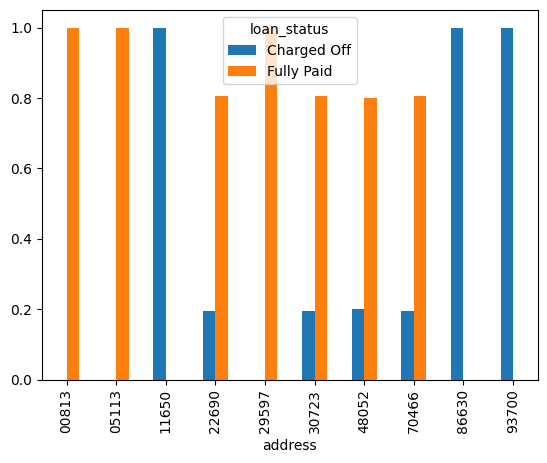

In [ ]:
pd.crosstab(index = df["address"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [ ]:
df["pin_code"] = df["address"]
df.drop(["address"],axis = 1  ,inplace=True)

In [ ]:
df.drop(["title","issue_d","earliest_cr_line","initial_list_status"],axis = 1, inplace=True)

In [ ]:
df.drop(["pin_code","Loan_Tenure"],axis=1,inplace=True)

In [ ]:
missing_data[missing_data["Percent"]>0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [ ]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy="most_frequent")
df["mort_acc"] = Imputer.fit_transform(df["mort_acc"].values.reshape(-1,1))

In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_df(df)

,Total,Percent
loan_amnt,0,0.0
term,0,0.0
mort_acc,0,0.0
application_type,0,0.0
total_acc,0,0.0
revol_util,0,0.0
revol_bal,0,0.0
pub_rec,0,0.0
open_acc,0,0.0
dti,0,0.0


In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
TE = TargetEncoder()
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [ ]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
101685,9200.0,36,6.24,280.89,A,A2,PRA,10+ years,MORTGAGE,45000.0,...,credit_card,10.72,8.0,0.0,11454.0,41.2,20.0,INDIVIDUAL,3.0,0.0
242110,9450.0,36,10.74,308.22,B,B2,University of Texas Medical Branch,10+ years,MORTGAGE,40000.0,...,debt_consolidation,29.26,10.0,0.0,22032.0,59.7,20.0,INDIVIDUAL,2.0,0.0
204469,25000.0,60,15.59,602.52,D,D1,President/CEO,3 years,MORTGAGE,102000.0,...,debt_consolidation,15.58,13.0,0.0,27928.0,80.8,17.0,INDIVIDUAL,1.0,0.0
389395,17000.0,60,12.99,386.72,C,C1,Swing Driver,10+ years,RENT,75000.0,...,debt_consolidation,11.36,6.0,0.0,11409.0,38.5,23.0,INDIVIDUAL,3.0,0.0
140929,2000.0,36,12.69,67.09,C,C2,SVM Event Manager,6 years,OWN,52000.0,...,vacation,0.00,4.0,0.0,0.0,0.0,10.0,INDIVIDUAL,0.0,0.0


In [ ]:
target_enc = ["sub_grade","grade",'term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type']

In [ ]:
for col in target_enc:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()

    df[col] = TEncoder.fit_transform(df[col],df["loan_status"])

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,0.121856,0.134935,0.247136,0.184208,0.222392,117000.0,...,0.183348,26.24,16.0,0.0,36369.0,41.8,25.0,0.1922,0.0,0.0
1,8000.0,36,11.99,265.68,0.121856,0.150496,0.214018,0.191896,0.166495,65000.0,...,0.203895,22.05,17.0,0.0,20131.0,53.3,27.0,0.1922,3.0,0.0
2,15600.0,36,10.49,506.97,0.121856,0.119644,0.189214,0.206840,0.222392,43057.0,...,0.162381,12.79,13.0,0.0,11987.0,92.2,26.0,0.1922,0.0,0.0
3,7200.0,36,6.49,220.65,0.059785,0.044741,0.167211,0.189319,0.222392,54000.0,...,0.162381,2.60,6.0,0.0,5472.0,21.5,13.0,0.1922,0.0,0.0
4,24375.0,60,17.27,609.33,0.207325,0.239437,0.297320,0.200951,0.166495,55000.0,...,0.162381,33.95,13.0,0.0,24584.0,69.8,43.0,0.1922,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,0.121856,0.134935,0.167211,0.193219,0.222392,40000.0,...,0.203895,15.63,6.0,0.0,1990.0,34.3,23.0,0.1922,0.0,0.0
396026,21000.0,36,12.29,700.42,0.207325,0.168489,0.220430,0.191915,0.166495,110000.0,...,0.203895,21.45,6.0,0.0,43263.0,95.7,8.0,0.1922,1.0,0.0
396027,5000.0,36,9.99,161.32,0.121856,0.094672,0.267968,0.184208,0.222392,56500.0,...,0.203895,17.56,15.0,0.0,32704.0,66.9,23.0,0.1922,0.0,0.0
396028,21000.0,60,15.31,503.02,0.207325,0.192642,0.167211,0.184208,0.166495,64000.0,...,0.203895,15.88,9.0,0.0,15704.0,53.8,20.0,0.1922,5.0,0.0


In [ ]:
def outlier_remover(a,df):

    q1 = a.quantile(.25)
    q3 = a.quantile(.75)
    iqr = q3 - q1

    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr

    return df.loc[(a>=minn) & (a<=maxx)]

In [ ]:
floats = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']

In [ ]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
185947,23825.0,60,13.33,546.13,0.207325,0.215110,0.106322,0.184208,0.166495,82000.0,...,0.203895,27.12,12.0,0.0,13562.0,26.6,18.0,0.1922,2.0,0.0
352884,12000.0,36,6.03,365.23,0.059785,0.026526,0.167211,0.195177,0.222392,30000.0,...,0.298557,1.60,8.0,0.0,1262.0,2.1,16.0,0.1922,4.0,0.0
143147,16000.0,60,14.99,380.56,0.207325,0.239437,0.357746,0.194577,0.166495,44000.0,...,0.162381,21.39,9.0,0.0,15491.0,66.8,14.0,0.1922,2.0,0.0
102805,6000.0,60,16.77,148.38,0.371029,0.364713,0.265506,0.199355,0.222392,39000.0,...,0.160684,9.54,6.0,0.0,1373.0,20.5,21.0,0.1922,0.0,0.0
395506,1500.0,36,13.65,51.02,0.207325,0.168489,0.365848,0.198859,0.222392,29000.0,...,0.229112,12.67,10.0,1.0,1766.0,32.1,31.0,0.1922,0.0,1.0


In [ ]:
for i in floats:
    df = outlier_remover(df[i],df)

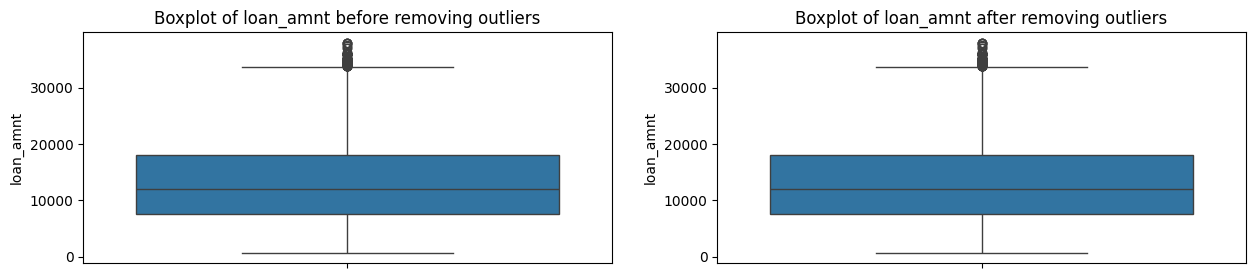

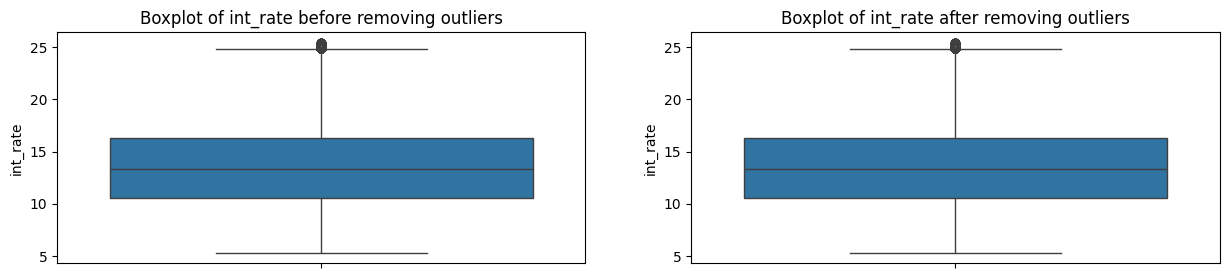

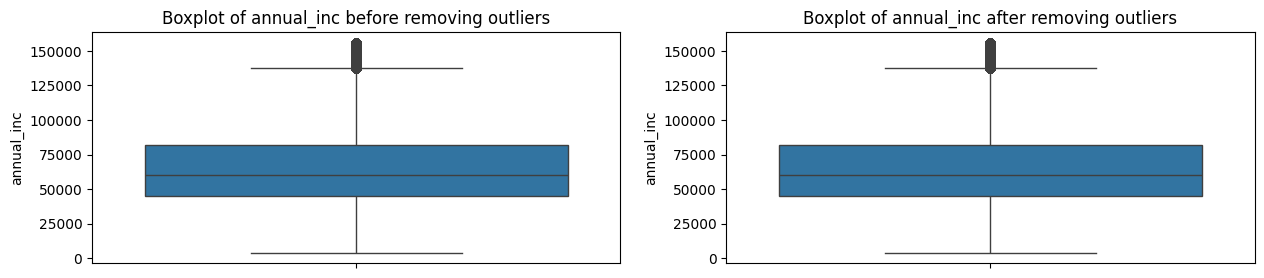

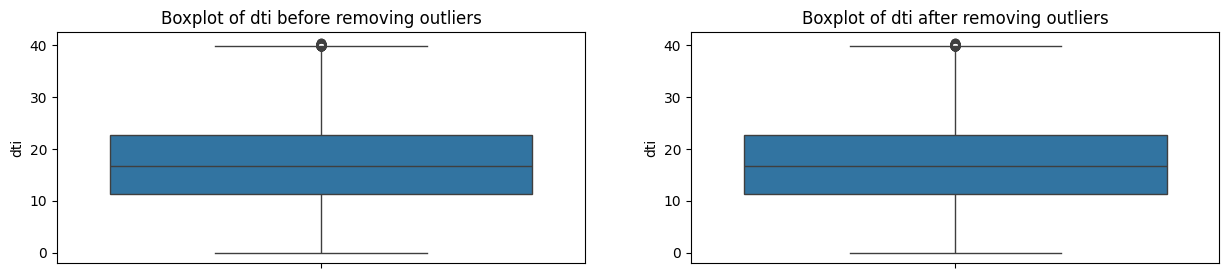

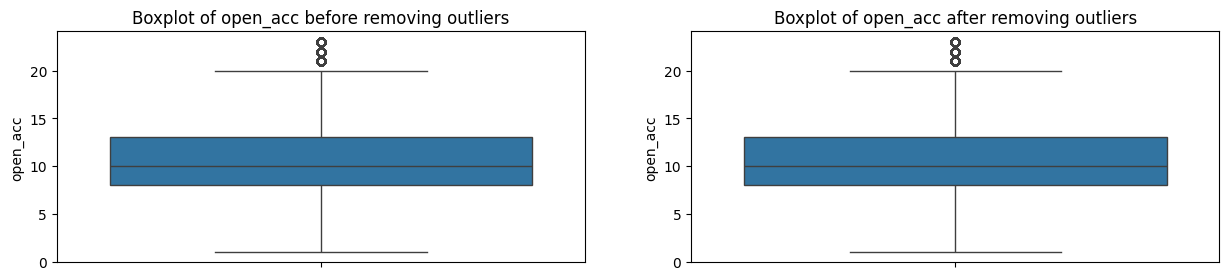

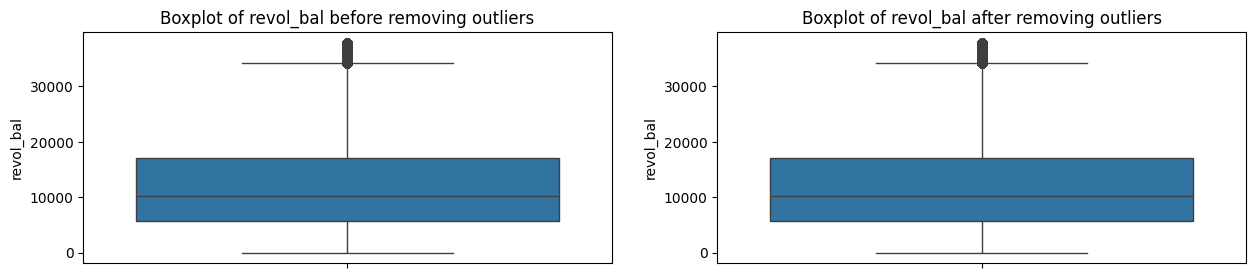

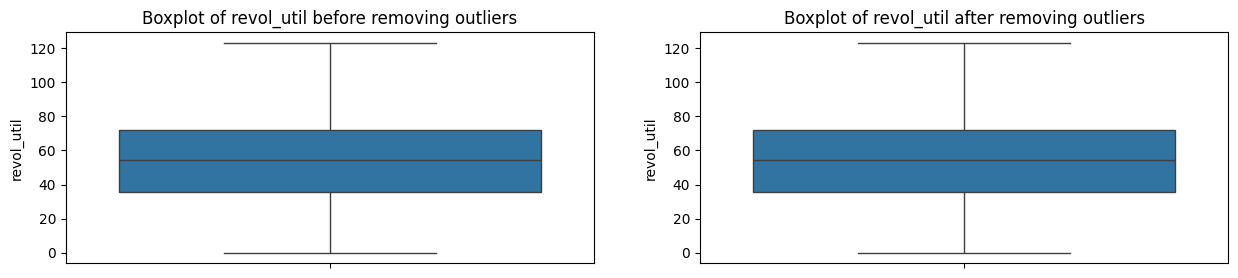

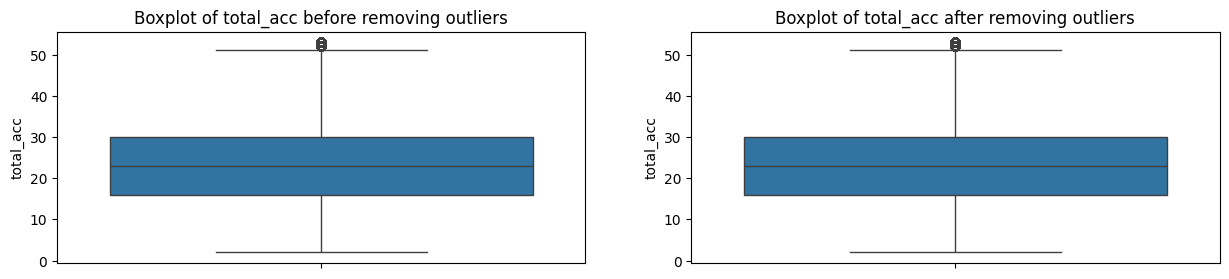

In [ ]:
for i in floats:
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    sns.boxplot(y=df[i])
    plt.title(f"Boxplot of {i} before removing outliers")
    plt.subplot(122)
    sns.boxplot(y=df[i])
    plt.title(f"Boxplot of {i} after removing outliers")

    plt.show()

In [ ]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]

,Total,Percent


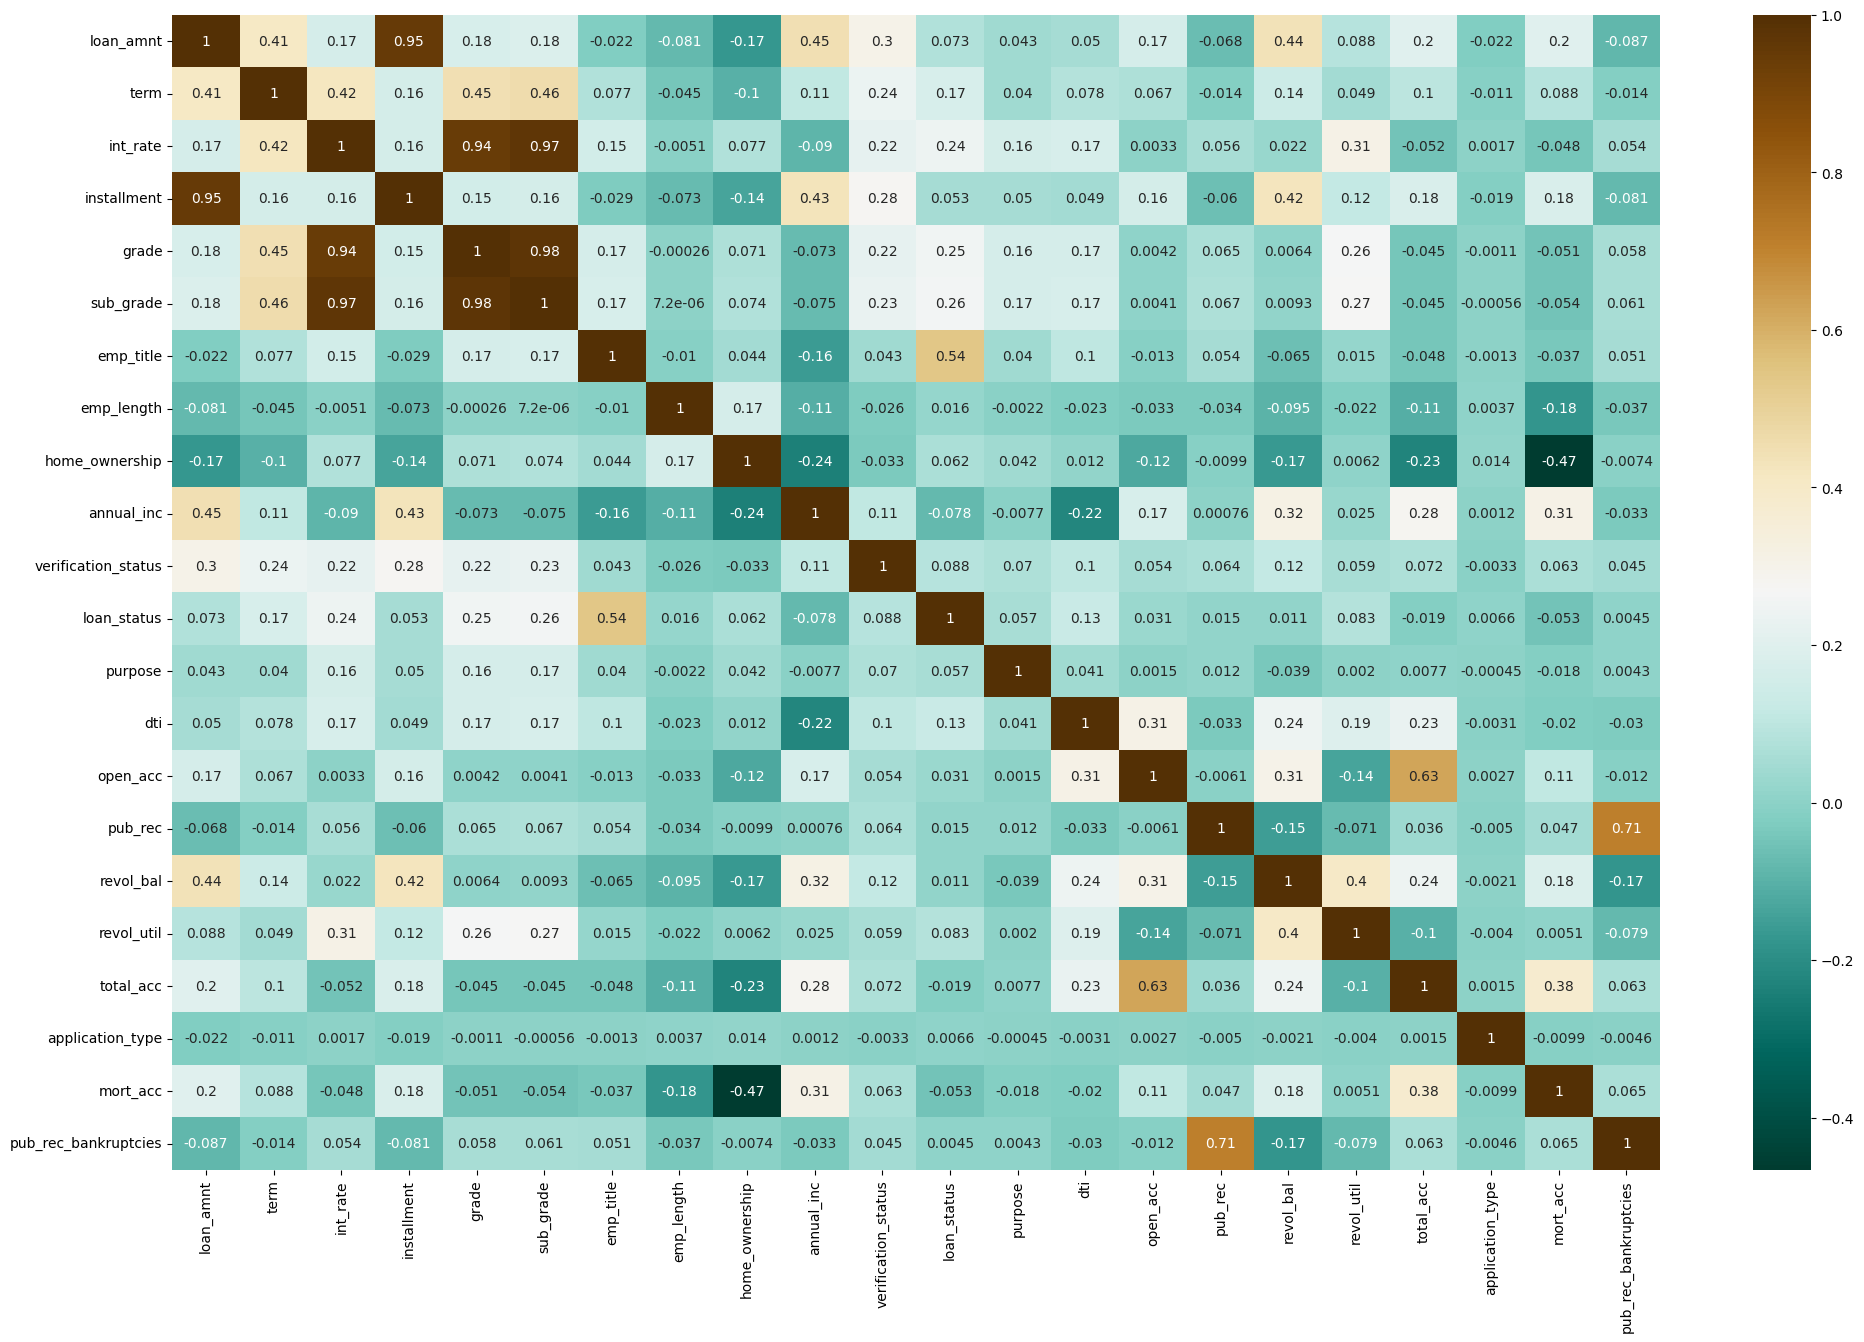

In [ ]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG_r')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["loan_status"],axis = 1)
y = df["loan_status"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=3, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR1st = LogisticRegression(class_weight="balanced")

In [ ]:
LR1st.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
LR1st.score(X_test,y_test)

0.5597003326183593

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [ ]:
f1_score(y_test,LR1st.predict(X_test))

0.378253807997893

In [ ]:
recall_score(y_test,LR1st.predict(X_test))

0.6968863728265264

In [ ]:
precision_score(y_test,LR1st.predict(X_test))

0.2595716480404856

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [ ]:
StandardScaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = StandardScaler.transform(X_train)
X_test = StandardScaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Std = LogisticRegression(C=1.0)
LR_Std.fit(X_train,y_train)
print("Accuracy: ",LR_Std.score(X_test,y_test))
print("f1_score: ",f1_score(y_test,LR_Std.predict(X_test)))
print("recall_score: ",recall_score(y_test,LR_Std.predict(X_test)))
print("precision_score: ",precision_score(y_test,LR_Std.predict(X_test)))

Accuracy:  0.8683826043706674
f1_score:  0.6080355489724125
recall_score:  0.5311767084512737
precision_score:  0.710899447992207


In [ ]:
pd.DataFrame(data=LR_Std.coef_,columns=X.columns).T

,0
loan_amnt,0.031765
term,0.235352
int_rate,0.123633
installment,0.089587
grade,-0.040707
sub_grade,0.310467
emp_title,1.395471
emp_length,0.054269
home_ownership,0.119213
annual_inc,0.000976


<Axes: >

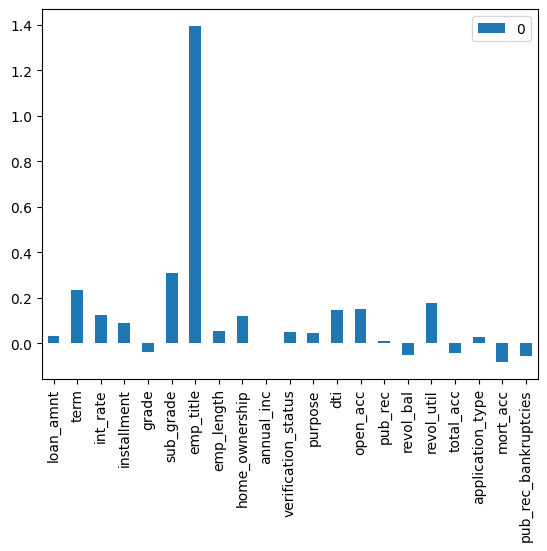

In [ ]:
pd.DataFrame(data=LR_Std.coef_,columns=X.columns).T.plot(kind = "bar")

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
SmoteBL = SMOTE(k_neighbors=7)

In [ ]:
X_smote , y_smote = SmoteBL.fit_resample(X_train,y_train)

In [ ]:
X_smote.shape,  y_smote.shape

((416188, 21), (416188,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
LogReg = LogisticRegression(max_iter=1000,class_weight="balanced")

In [ ]:
cross_val_score(estimator = LogReg,cv=5,X = X_smote,y = y_smote,scoring= "f1")

array([0.81036101, 0.81804471, 0.82235709, 0.81949238, 0.82181366])

In [ ]:
cross_val_score(estimator = LogReg,cv=5,X = X_smote,y = y_smote,scoring= "precision")

array([0.83343068, 0.83530325, 0.83613111, 0.83504589, 0.83360522])

In [ ]:
cross_val_score(estimator = LogReg,cv=5,X = X_smote,y = y_smote,scoring= "recall")

array([0.78853408, 0.8014849 , 0.80902953, 0.80450766, 0.81035104])

In [ ]:
cross_val_score(estimator = LogReg,cv=5,X = X_smote,y = y_smote,scoring= "accuracy")

array([0.8154689 , 0.82172806, 0.82523607, 0.82279515, 0.82429689])

In [ ]:
cross_val_score(estimator = LogReg,cv=5,X = X_train,y = y_train,scoring= "precision")

array([0.53200247, 0.53858246, 0.5348086 , 0.53494351, 0.52934352])

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000,class_weight="balanced")

In [ ]:
LogReg.fit(X= X_train ,y = y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
LogReg.score(X_test,y_test)

0.8262923932978955

In [ ]:
LogReg.coef_.round(2)

array([[ 0.08,  0.22, -0.06,  0.05, -0.05,  0.53,  1.47,  0.05,  0.12,
         0.02,  0.06,  0.05,  0.16,  0.15,  0.02, -0.06,  0.15, -0.04,
         0.03, -0.06, -0.05]])

In [ ]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
print(confusion_matrix(y_test, LogReg.predict(X_test)))
print(precision_score(y_test ,LogReg.predict(X_test)))
print(recall_score(y_test ,LogReg.predict(X_test)))
print(f1_score(y_test ,LogReg.predict(X_test)))

[[43364  8609]
 [ 2567  9798]]
0.5322974955180094
0.79239789729074
0.6368126868581827


In [ ]:
LogReg.coef_

array([[ 0.08034495,  0.21512599, -0.06476987,  0.05035355, -0.04763438,
         0.5255744 ,  1.4699488 ,  0.04748129,  0.11617994,  0.01785234,
         0.05793   ,  0.045094  ,  0.16448878,  0.14615277,  0.021944  ,
        -0.05638368,  0.15362626, -0.04296082,  0.03462994, -0.05998225,
        -0.0478313 ]])

In [ ]:
df.drop(["loan_status"], axis = 1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
feature_imp = pd.DataFrame(index = df.drop(["loan_status"],axis = 1).columns,data = LogReg.coef_.ravel()).reset_index()
feature_imp

,index,0
0,loan_amnt,0.080345
1,term,0.215126
2,int_rate,-0.064770
3,installment,0.050354
4,grade,-0.047634
5,sub_grade,0.525574
6,emp_title,1.469949
7,emp_length,0.047481
8,home_ownership,0.116180
9,annual_inc,0.017852


<Axes: xlabel='0', ylabel='index'>

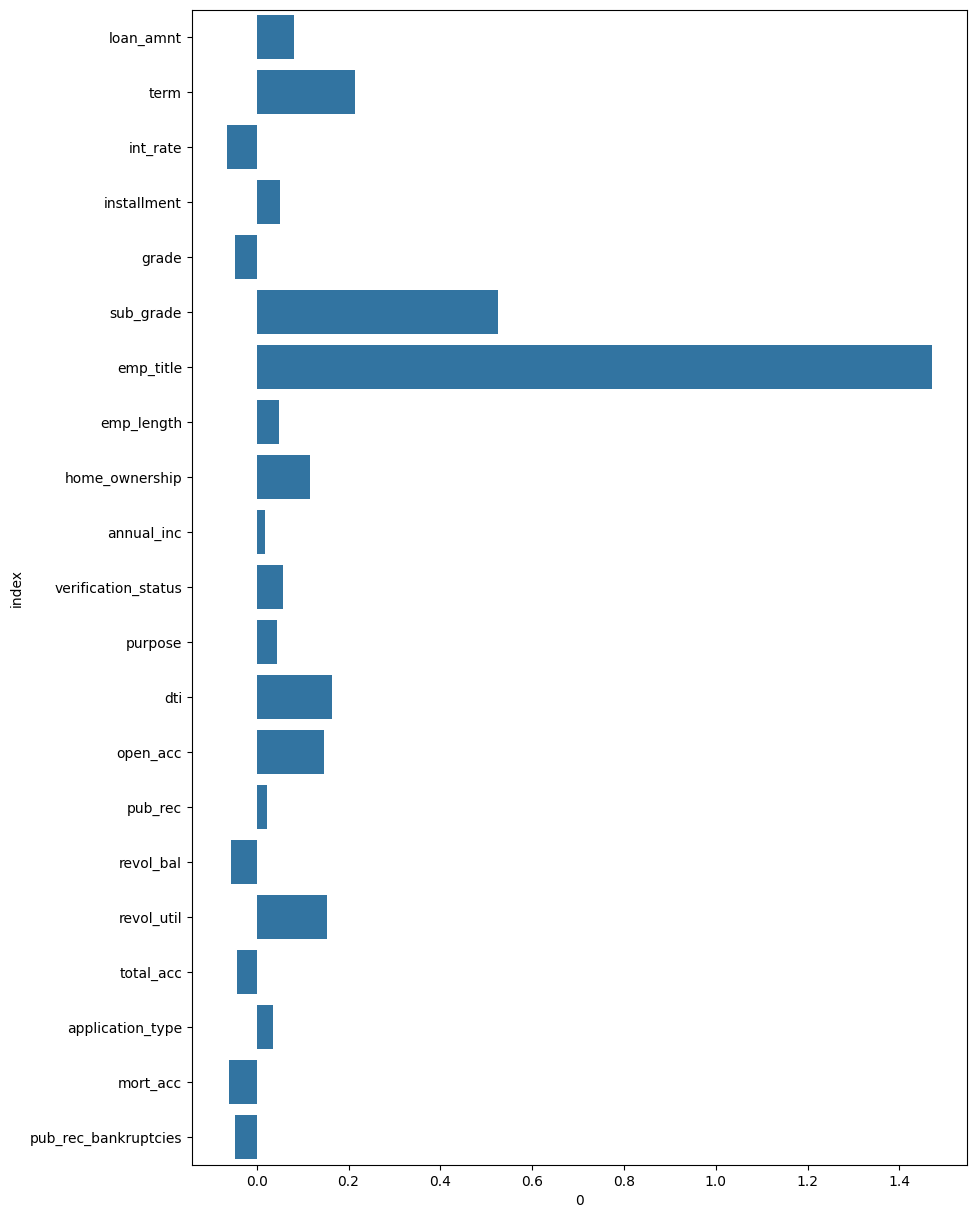

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_imp["index"],
           x =  feature_imp[0])

In [ ]:
LogReg.score(X_train,y_train)

0.8280163201865164

In [ ]:
LogReg.score(X_test,y_test)

0.8262923932978955

<Axes: >

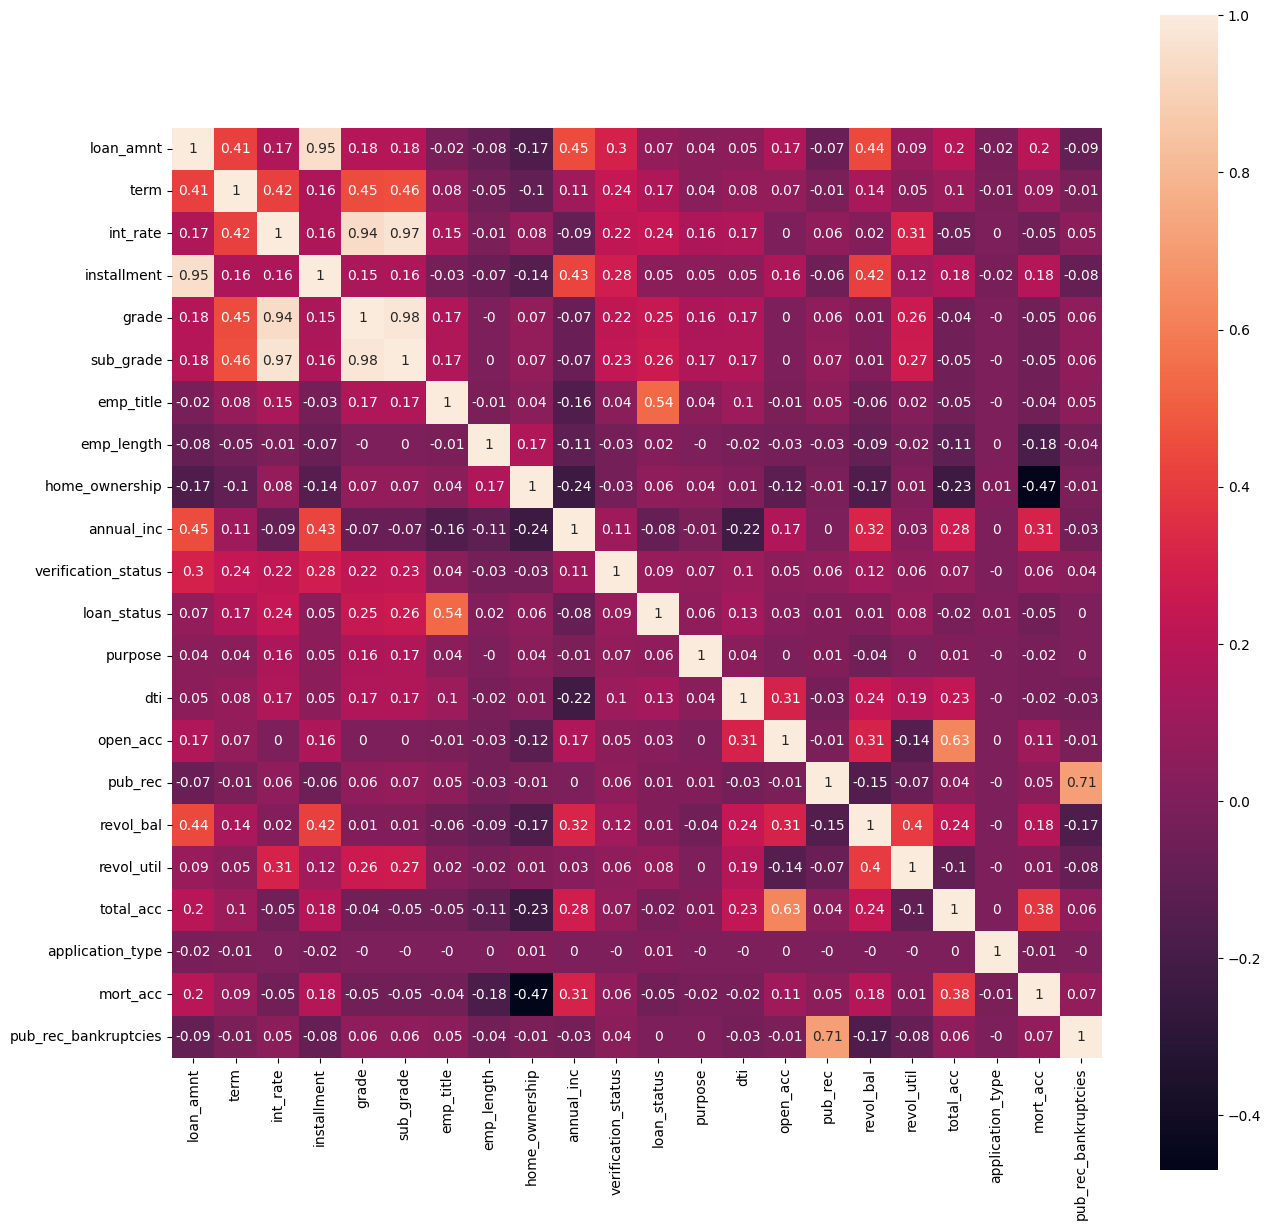

In [ ]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().round(2),annot=True,square=True)

In [ ]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
confusion_matrix(y_test, LogReg.predict(X_test))

array([[43364,  8609],
       [ 2567,  9798]])

In [ ]:
precision_score(y_test ,LogReg.predict(X_test))

0.5322974955180094

In [ ]:
recall_score(y_test ,LogReg.predict(X_test))

0.79239789729074

In [ ]:
pd.crosstab(y_test ,LogReg.predict(X_test))

col_0,0,1
loan_status,,
0,43364,8609
1,2567,9798


In [ ]:
recall_score(y_train ,LogReg.predict(X_train))

0.7937510151047588

In [ ]:
recall_score(y_test ,LogReg.predict(X_test))

0.79239789729074

In [ ]:
f1_score(y_test ,LogReg.predict(X_test))

0.6368126868581827

In [ ]:
f1_score(y_train ,LogReg.predict(X_train))

0.6385581524490829

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import fbeta_score

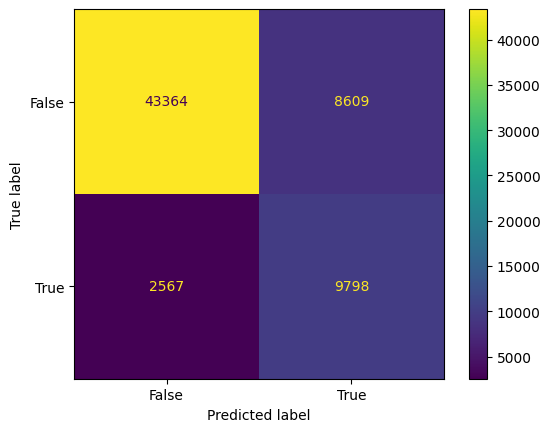

In [ ]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, LogReg.predict(X_test)),display_labels=[False,True])
cm_display.plot()
plt.show()

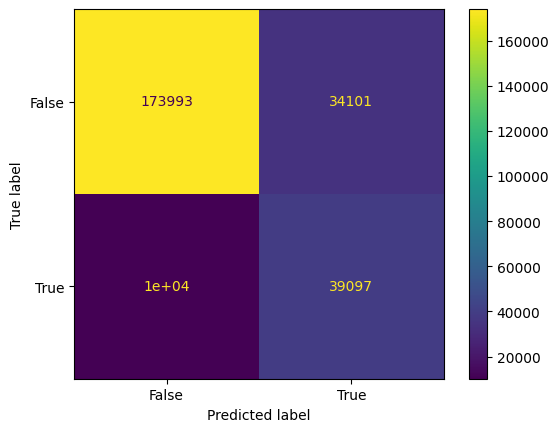

In [ ]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_train, LogReg.predict(X_train)),display_labels=[False,True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=5, splitter="best",criterion="entropy",class_weight ="balanced")

In [ ]:
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

In [ ]:
DecisionTreeClassifier.score(X_test,y_test)

0.7946936491653456

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=30,max_depth=10,class_weight="balanced")
RF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=30)

In [ ]:
RF.score(X_test,y_test)

0.8081227268488296

In [ ]:
feature_imp = pd.DataFrame(index = df.drop(["loan_status"],axis = 1).columns,data = RF.feature_importances_.ravel()).reset_index()
feature_imp

,index,0
0,loan_amnt,0.007891
1,term,0.019560
2,int_rate,0.050538
3,installment,0.008936
4,grade,0.060315
5,sub_grade,0.071166
6,emp_title,0.709179
7,emp_length,0.002100
8,home_ownership,0.003514
9,annual_inc,0.011871


<Axes: xlabel='0', ylabel='index'>

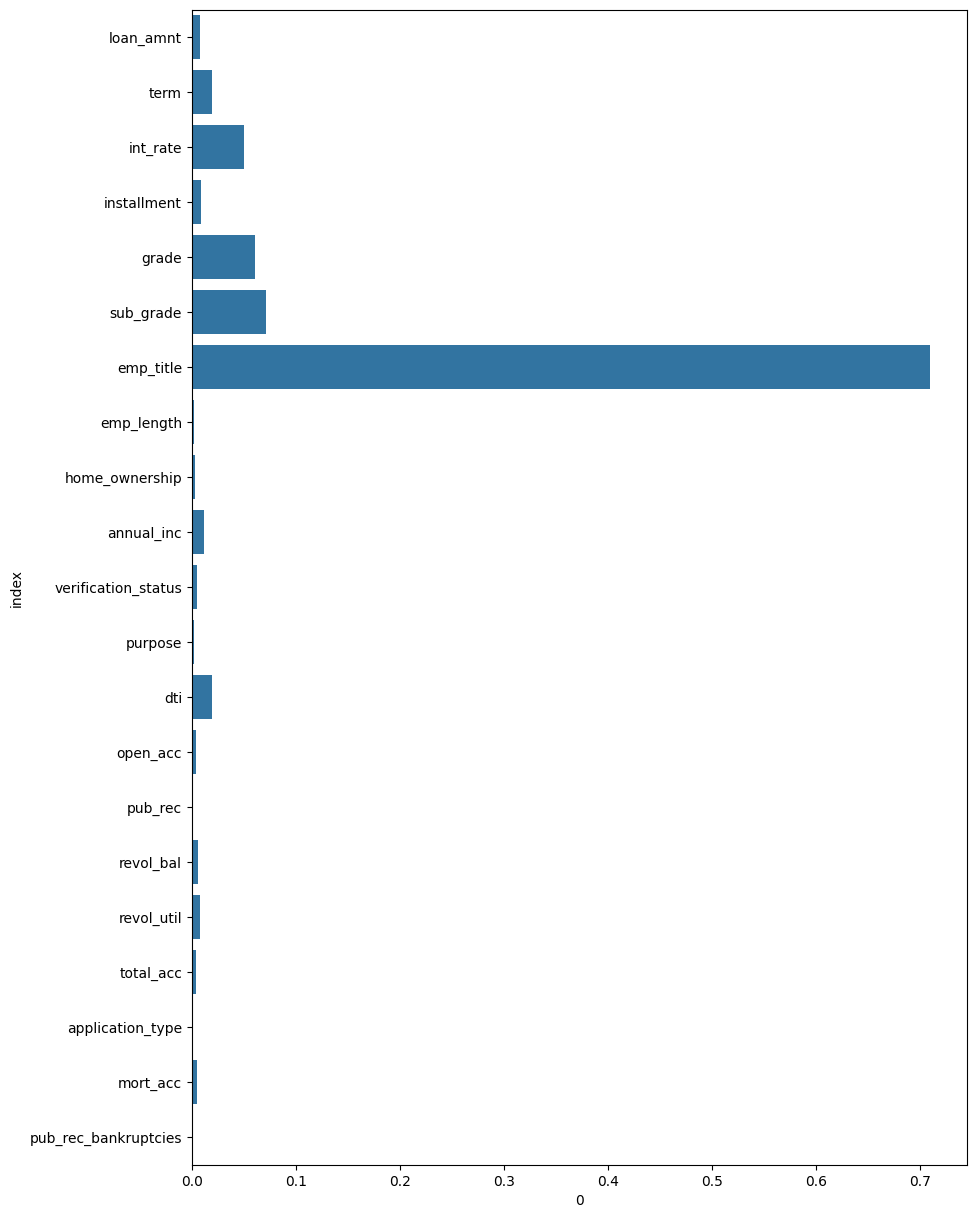

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_imp["index"],
           x =  feature_imp[0])

In [ ]:
from sklearn.metrics import precision_recall_curve

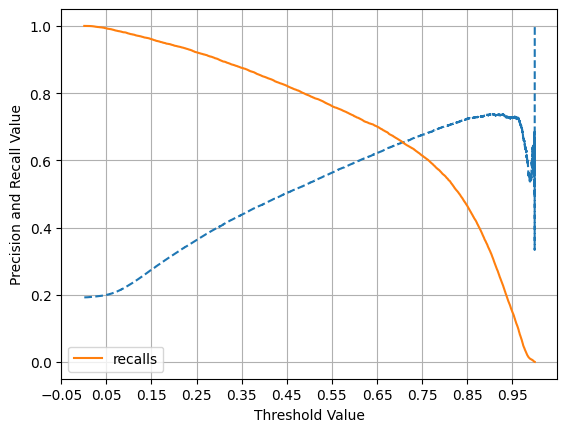

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])

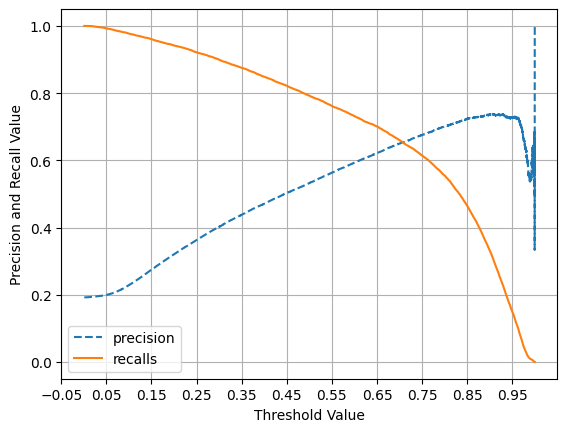

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

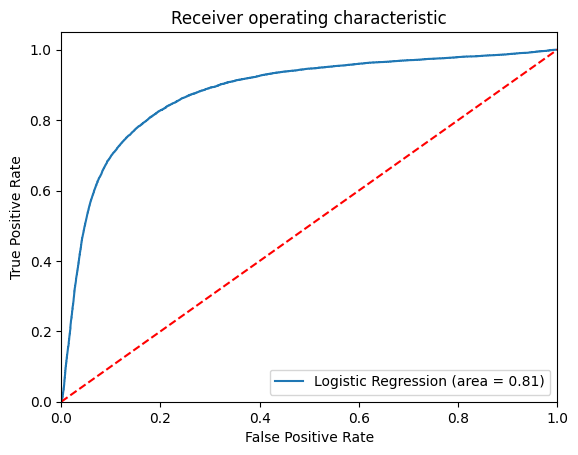

In [ ]:
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
LogReg.predict_proba(X_test)

array([[0.74041292, 0.25958708],
       [0.85083519, 0.14916481],
       [0.52562324, 0.47437676],
       ...,
       [0.63337229, 0.36662771],
       [0.80213775, 0.19786225],
       [0.71857059, 0.28142941]])

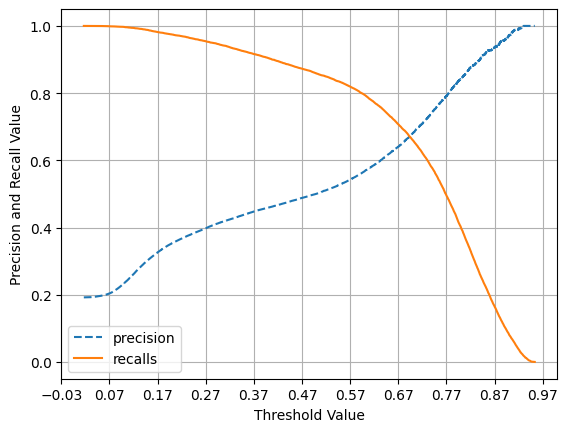

In [ ]:
precision_recall_curve_plot(y_test, RF.predict_proba(X_test)[:,1])

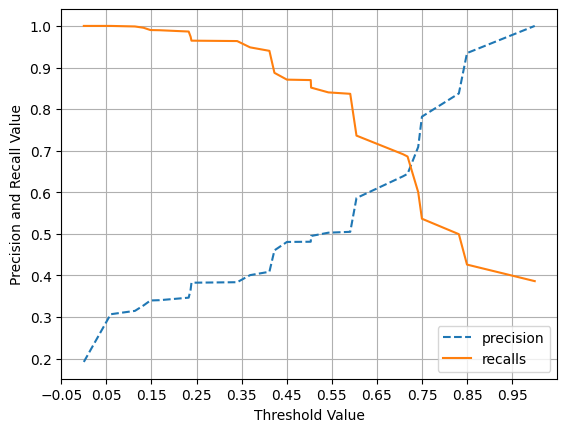

In [ ]:
precision_recall_curve_plot(y_test, DecisionTreeClassifier.predict_proba(X_test)[:,1])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
def custom_predict(X, threshold):
    probs = model.predict_proba(X)
    return (probs[:, 1] > threshold).astype(int)

In [ ]:
new_preds = custom_predict(X=X_test, threshold=0.75)

In [ ]:
model.score(X_test,y_test)

0.8262923932978955

In [ ]:
precision_score(y_test,new_preds)

0.6757742969028124

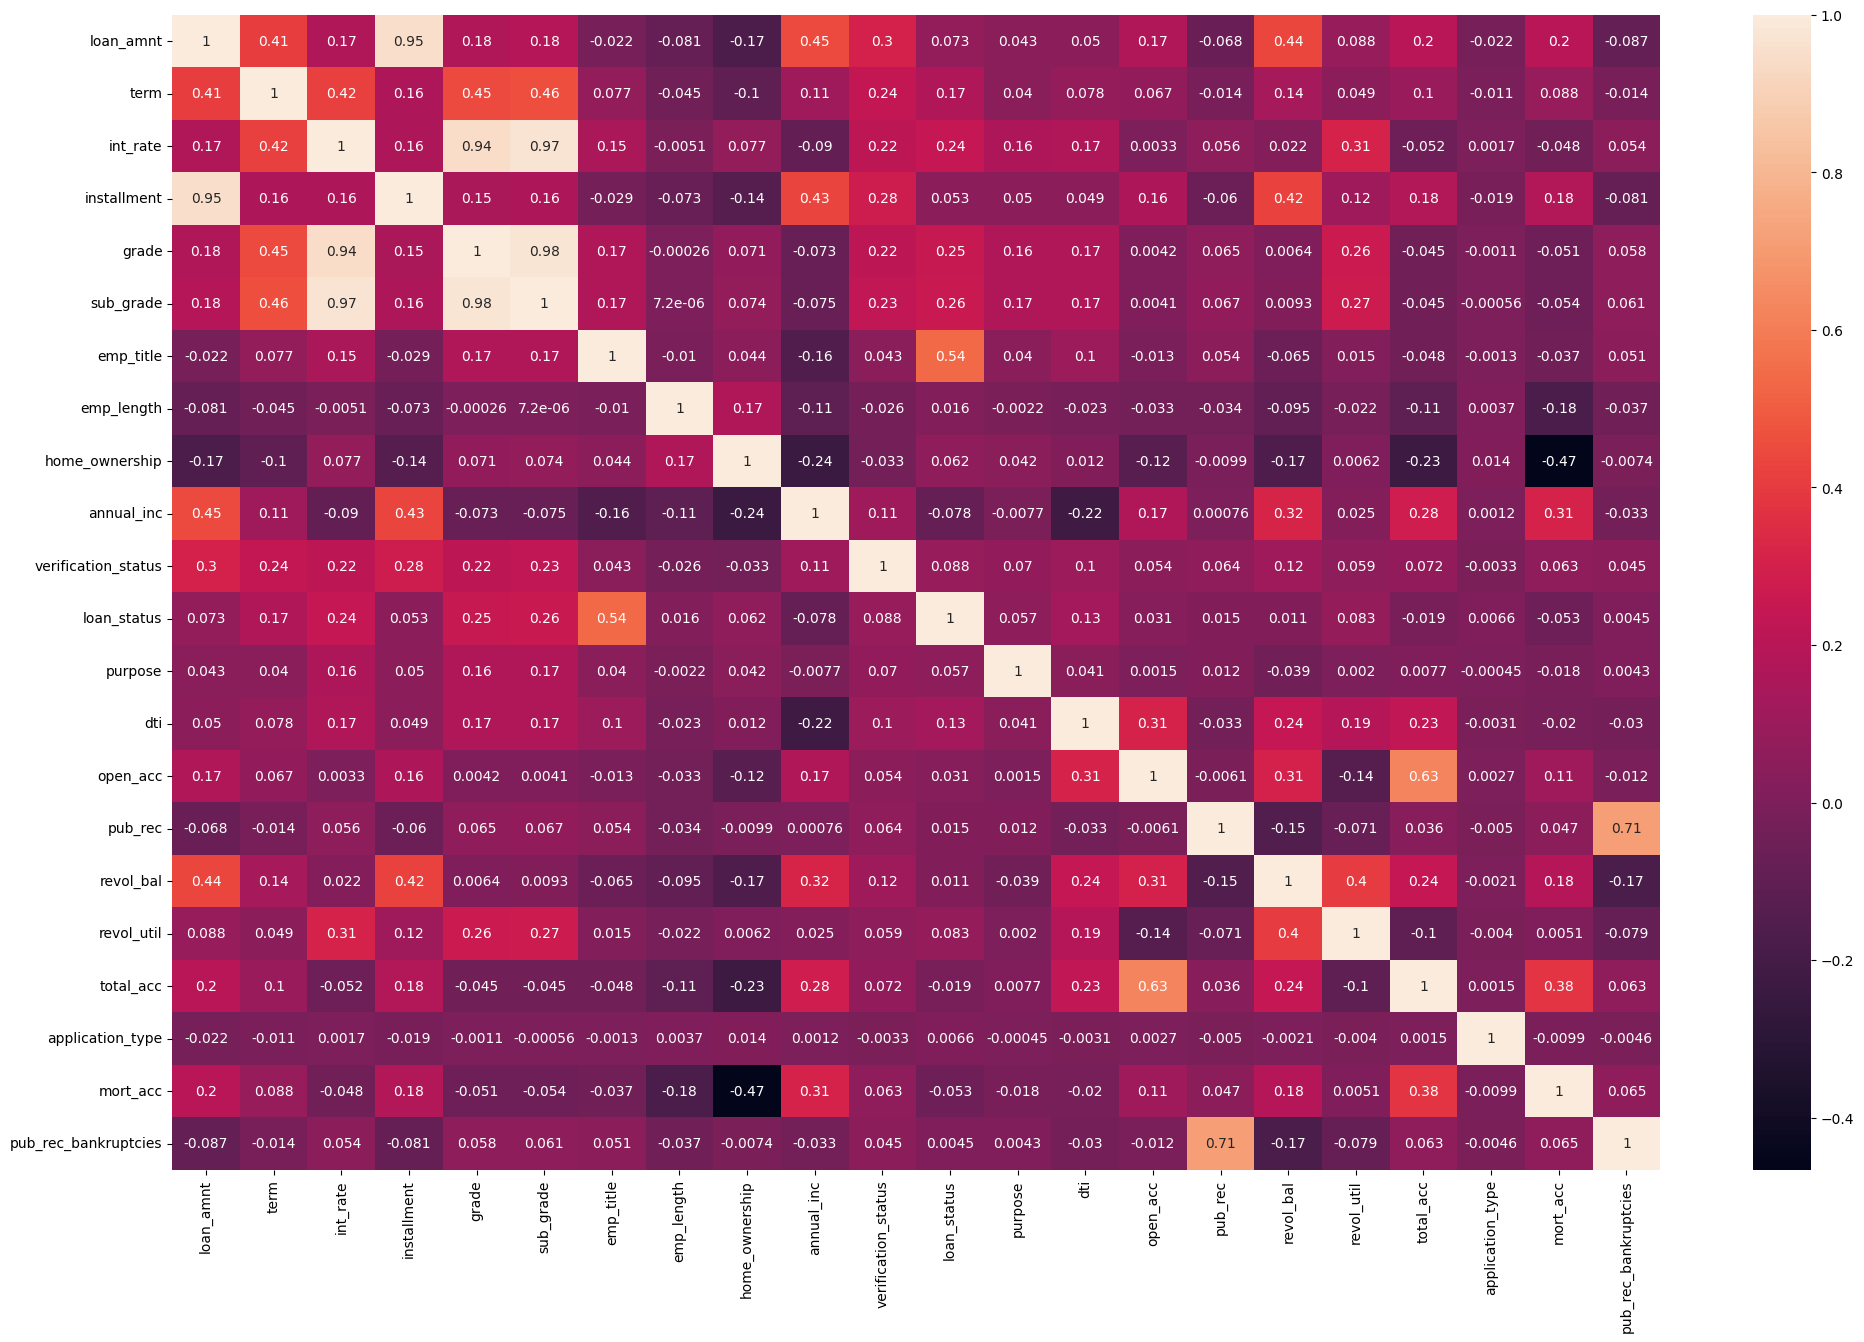

In [ ]:
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),annot=True)

plt.show()